In [147]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score

In [2]:
#loading datasets 

impressions = pd.read_csv('Campaign Data/IMPRESSIONS.csv')
activity = pd.read_csv('Campaign Data/ACTIVITY.csv')
placements = pd.read_csv('Campaign Data/PLACEMENTS.csv')
ads = pd.read_csv('Campaign Data/ADS.csv')
audience = pd.read_csv('Campaign Data/AUDIENCE.csv')
market = pd.read_csv('Campaign Data/MARKET.csv')
os = pd.read_csv('Campaign Data/OS.csv')
site = pd.read_csv('Campaign Data/SITE.csv')

# Lookup Tables 


## Placements 

In [3]:
placements.shape

(651, 9)

In [4]:
placements.columns

Index(['Placement_id', 'Site_id', 'Channel', 'Platform', 'Audience_id',
       'Placement_size', ' CPM ', 'Buy_type', 'Prog_sub_buy_type'],
      dtype='object')

In [5]:
placements.dtypes

Placement_id          int64
Site_id               int64
Channel              object
Platform             object
Audience_id           int64
Placement_size       object
 CPM                 object
Buy_type             object
Prog_sub_buy_type    object
dtype: object

In [6]:
placements.describe(include = 'all')

,Placement_id,Site_id,Channel,Platform,Audience_id,Placement_size,CPM,Buy_type,Prog_sub_buy_type
count,6.510000e+02,651.000000,651,616,651.000000,651,651,651,456
unique,NaN,NaN,2,3,NaN,14,605,2,3
top,NaN,NaN,Mob,Desk,NaN,300x250,$11.05,Programatic,RTB
freq,NaN,NaN,354,297,NaN,169,3,456,381
mean,2.078405e+08,49142.609831,NaN,NaN,449.235023,NaN,NaN,NaN,NaN
std,2.772782e+06,19063.994549,NaN,NaN,179.944868,NaN,NaN,NaN,NaN
min,2.012713e+08,11938.000000,NaN,NaN,114.000000,NaN,NaN,NaN,NaN
25%,2.083428e+08,39362.000000,NaN,NaN,356.000000,NaN,NaN,NaN,NaN
50%,2.084299e+08,39869.000000,NaN,NaN,529.000000,NaN,NaN,NaN,NaN
75%,2.091048e+08,47923.000000,NaN,NaN,529.000000,NaN,NaN,NaN,NaN


In [7]:
placements.head()

,Placement_id,Site_id,Channel,Platform,Audience_id,Placement_size,CPM,Buy_type,Prog_sub_buy_type
0,201271259,39869,Desk,Desk,486,728x90,$1.18,Programatic,RTB
1,201271265,39869,Mob,IA,529,300x250,$2.34,Programatic,RTB
2,201271271,39869,Mob,IA,529,336x280,$2.58,Programatic,RTB
3,201271274,39869,Mob,IA,743,336x280,$3.64,Programatic,RTB
4,201271277,39869,Mob,IA,743,728x90,$2.71,Programatic,RTB


In [8]:
#checking for null values 

placements[placements.isnull().any(axis=1)].shape

(198, 9)

In [9]:
placements[placements.isnull().any(axis=1)].head()

,Placement_id,Site_id,Channel,Platform,Audience_id,Placement_size,CPM,Buy_type,Prog_sub_buy_type
93,208229896,44436,Desk,Desk,529,Social 1,$65.02,Direct,NaN
94,208229917,44436,Desk,Desk,529,Social 1,$22.46,Direct,NaN
105,208342574,92700,Desk,Desk,529,300x250,$27.78,Direct,NaN
109,208342598,92700,Desk,Desk,529,300x600,$9.39,Direct,NaN
115,208342622,92700,Desk,Desk,529,728x90,$10.16,Direct,NaN


In [10]:
placements['Prog_sub_buy_type'].value_counts()

RTB    381
PG      64
PMP     11
Name: Prog_sub_buy_type, dtype: int64

In [11]:
#filling in null values with most popular value in prog_sub_buy_type

placements = placements.fillna({"Prog_sub_buy_type": "RTB"})

In [12]:
#converting CPM column to float 

placements[' CPM '] = placements[' CPM '].str.replace('$', '').astype(float)

In [13]:
#CPM converted to float

placements.dtypes

Placement_id           int64
Site_id                int64
Channel               object
Platform              object
Audience_id            int64
Placement_size        object
 CPM                 float64
Buy_type              object
Prog_sub_buy_type     object
dtype: object

In [14]:
#Checking unique count for id columns
print(placements['Placement_id'].nunique())
print(placements['Site_id'].nunique())
print(placements['Audience_id'].nunique())

651
15
6


## Ads 

In [15]:
ads.shape

(233, 4)

In [16]:
ads.columns

Index(['Ad_id', 'Ad_size', 'Ad_format', 'Marketing_goal'], dtype='object')

In [17]:
ads.dtypes

Ad_id              int64
Ad_size           object
Ad_format         object
Marketing_goal    object
dtype: object

In [18]:
ads.describe(include = 'all')

,Ad_id,Ad_size,Ad_format,Marketing_goal
count,2.330000e+02,233,233,233
unique,NaN,15,4,2
top,NaN,300x250,Standard,Brand
freq,NaN,81,142,174
mean,4.095619e+08,NaN,NaN,NaN
std,2.056893e+07,NaN,NaN,NaN
min,4.009045e+08,NaN,NaN,NaN
25%,4.081072e+08,NaN,NaN,NaN
50%,4.081593e+08,NaN,NaN,NaN
75%,4.088908e+08,NaN,NaN,NaN


In [19]:
ads.head()

,Ad_id,Ad_size,Ad_format,Marketing_goal
0,400904538,Social 1,Custom Social,Brand
1,400906394,Social 1,Custom Social,Brand
2,400922607,Social 1,Custom Social,Brand
3,500949438,:06,Video,Brand
4,600949438,:15,Video,Brand


In [20]:
#checking for null values 
ads[ads.isnull().any(axis=1)].shape

(0, 4)

In [21]:
#checking unique count for Ad_id

ads['Ad_id'].nunique()

233

In [261]:
ads['Marketing_goal'].value_counts()

Brand    174
DR        59
Name: Marketing_goal, dtype: int64

## Audience

In [22]:
audience.shape

(6, 2)

In [23]:
audience.columns

Index(['Audience_id', 'Audience_name'], dtype='object')

In [24]:
audience.dtypes

Audience_id       int64
Audience_name    object
dtype: object

In [25]:
audience.describe(include = 'all')

,Audience_id,Audience_name
count,6.000000,6
unique,NaN,6
top,NaN,Young Professionals
freq,NaN,1
mean,518.666667,NaN
std,273.928214,NaN
min,114.000000,NaN
25%,388.500000,NaN
50%,507.500000,NaN
75%,689.500000,NaN


In [26]:
#returning entire dataset since only 6 rows 

audience

,Audience_id,Audience_name
0,743,Deal Seekers
1,486,Frequent Travelers
2,529,Young Professionals
3,356,Recently Retired
4,884,Adventure Junkies
5,114,Amtrak Users


## Market

In [27]:
market.shape

(210, 2)

In [28]:
market.columns

Index(['Market_id', 'Market'], dtype='object')

In [29]:
market.dtypes

Market_id     int64
Market       object
dtype: object

In [30]:
market.describe(include = 'all')

,Market_id,Market
count,210.000000,210
unique,NaN,210
top,NaN,Cheyenne WY-Scottsbluff NE
freq,NaN,1
mean,106.500000,NaN
std,60.765944,NaN
min,2.000000,NaN
25%,54.250000,NaN
50%,106.500000,NaN
75%,158.750000,NaN


In [31]:
market.head()

,Market_id,Market
0,6,Philadelphia PA
1,16,Buffalo NY
2,40,Rochester NY
3,98,Milwaukee WI
4,145,Minot-Bismarck-Dickinson(Williston) ND


In [32]:
# checking for null values

market[market.isnull().any(axis=1)].shape

(0, 2)

In [33]:
#checking unique count for Market_id

market['Market_id'].nunique()

210

## OS

In [34]:
os.shape

(6, 2)

In [35]:
os.columns

Index(['OS_id', 'OS'], dtype='object')

In [36]:
os.dtypes

OS_id     int64
OS       object
dtype: object

In [37]:
os.describe(include = 'all')

,OS_id,OS
count,6.000000,6
unique,NaN,6
top,NaN,Windows
freq,NaN,1
mean,501019.000000,NaN
std,9.273618,NaN
min,501011.000000,NaN
25%,501012.250000,NaN
50%,501015.000000,NaN
75%,501025.250000,NaN


In [38]:
os

,OS_id,OS
0,501011,Windows
1,501012,iOS
2,501013,Android
3,501017,Other
4,501028,Gaming Device
5,501033,Roku


## Site

In [39]:
site.shape

(15, 2)

In [40]:
site.columns

Index(['Site_id', 'Site_category'], dtype='object')

In [41]:
site.dtypes

Site_id           int64
Site_category    object
dtype: object

In [42]:
site.describe(include = 'all')

,Site_id,Site_category
count,15.000000,15
unique,NaN,6
top,NaN,News
freq,NaN,3
mean,46596.466667,NaN
std,26290.519100,NaN
min,11938.000000,NaN
25%,26817.500000,NaN
50%,40362.000000,NaN
75%,57325.000000,NaN


In [43]:
site.head()

,Site_id,Site_category
0,39869,Prog DSP
1,39362,Prog DSP
2,99272,Gaming
3,18421,News
4,23792,Weather


In [44]:
#checking for unique id count 
print(site['Site_id'].nunique())
print(site['Site_category'].nunique())

15
6


# Analysis Tables

## Activity - Conversions

In [45]:
activity.shape

(429, 7)

In [46]:
activity.columns

Index(['Conversion_time', 'User_id', 'Placement_id', 'Ad_id', 'Creative_id',
       'Event_type', 'Event_sub_type'],
      dtype='object')

In [47]:
activity.dtypes

Conversion_time    object
User_id            object
Placement_id        int64
Ad_id               int64
Creative_id         int64
Event_type         object
Event_sub_type     object
dtype: object

In [48]:
activity.describe(include = 'all')

,Conversion_time,User_id,Placement_id,Ad_id,Creative_id,Event_type,Event_sub_type
count,429,429,4.290000e+02,4.290000e+02,4.290000e+02,429,429
unique,429,429,NaN,NaN,NaN,1,2
top,10/7/17 19:22,UID_ea2BdFKw,NaN,NaN,NaN,CONVERSION,POSTVIEW
freq,1,1,NaN,NaN,NaN,429,258
mean,NaN,NaN,2.062220e+08,4.206479e+08,9.370011e+07,NaN,NaN
std,NaN,NaN,3.644193e+06,4.694518e+07,1.824623e+06,NaN,NaN
min,NaN,NaN,2.012713e+08,4.009045e+08,9.060061e+07,NaN,NaN
25%,NaN,NaN,2.012778e+08,4.011645e+08,9.377963e+07,NaN,NaN
50%,NaN,NaN,2.083941e+08,4.081514e+08,9.423344e+07,NaN,NaN
75%,NaN,NaN,2.088289e+08,4.088877e+08,9.472877e+07,NaN,NaN


In [49]:
activity.head()

,Conversion_time,User_id,Placement_id,Ad_id,Creative_id,Event_type,Event_sub_type
0,11/14/17 15:39,UID_mRKG1SAG,208429959,408107118,90735560,CONVERSION,POSTCLICK
1,12/26/17 5:46,UID_kWXdO9aK,208429962,408153593,94179716,CONVERSION,POSTVIEW
2,12/23/17 19:40,UID_0bcmRr-q,209616068,409365684,96132634,CONVERSION,POSTVIEW
3,11/16/17 22:13,UID_5QS-6PTh,208394113,408153593,94659437,CONVERSION,POSTCLICK
4,12/4/17 12:00,UID_NUwZHqvA,208394119,408153593,94659761,CONVERSION,POSTVIEW


In [50]:
#checking for null values
activity[activity.isnull().any(axis=1)].shape

(0, 7)

In [51]:
#converting Conversion_time to datetime column

activity['Conversion_time'] = pd.to_datetime(activity['Conversion_time'])

In [52]:
activity.head()

,Conversion_time,User_id,Placement_id,Ad_id,Creative_id,Event_type,Event_sub_type
0,2017-11-14 15:39:00,UID_mRKG1SAG,208429959,408107118,90735560,CONVERSION,POSTCLICK
1,2017-12-26 05:46:00,UID_kWXdO9aK,208429962,408153593,94179716,CONVERSION,POSTVIEW
2,2017-12-23 19:40:00,UID_0bcmRr-q,209616068,409365684,96132634,CONVERSION,POSTVIEW
3,2017-11-16 22:13:00,UID_5QS-6PTh,208394113,408153593,94659437,CONVERSION,POSTCLICK
4,2017-12-04 12:00:00,UID_NUwZHqvA,208394119,408153593,94659761,CONVERSION,POSTVIEW


In [53]:
print(activity['Placement_id'].nunique())
print(activity['Ad_id'].nunique())
print(activity['Creative_id'].nunique())

151
64
56


## Impressions

In [54]:
impressions.shape

(160097, 7)

In [55]:
impressions.columns

Index(['User_id', 'Impression_time', 'Placement_id', 'Ad_id', 'Creative_id',
       'Operating_system_id', 'Market_id'],
      dtype='object')

In [56]:
impressions.dtypes

User_id                 object
Impression_time         object
Placement_id             int64
Ad_id                    int64
Creative_id              int64
Operating_system_id    float64
Market_id              float64
dtype: object

In [57]:
impressions.describe(include = 'all')

,User_id,Impression_time,Placement_id,Ad_id,Creative_id,Operating_system_id,Market_id
count,160097,160097,1.600970e+05,1.600970e+05,1.600970e+05,154627.000000,152672.000000
unique,43709,77390,NaN,NaN,NaN,NaN,NaN
top,0,2017-12-26 19:23:00,NaN,NaN,NaN,NaN,NaN
freq,1717,16,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.055831e+08,4.161786e+08,9.349993e+07,501012.290771,89.492684
std,NaN,NaN,3.747370e+06,4.427920e+07,1.724189e+06,2.072299,70.560241
min,NaN,NaN,2.012713e+08,4.009045e+08,9.060061e+07,501011.000000,2.000000
25%,NaN,NaN,2.012778e+08,4.011645e+08,9.377963e+07,501011.000000,22.000000
50%,NaN,NaN,2.083827e+08,4.081399e+08,9.417972e+07,501012.000000,87.000000
75%,NaN,NaN,2.086765e+08,4.081737e+08,9.465976e+07,501013.000000,150.000000


In [58]:
impressions.head()

,User_id,Impression_time,Placement_id,Ad_id,Creative_id,Operating_system_id,Market_id
0,UID_px4mTvkq,2017-10-01 00:15:00,201278266,401163967,90785766,501011.0,197.0
1,UID_MG6hVBY9,2017-10-01 00:20:00,201277651,401163961,90785526,501011.0,190.0
2,UID_OmWyqHGo,2017-10-01 00:22:00,201271355,401163961,90784365,501011.0,204.0
3,UID_hSTrNBd6,2017-10-01 00:22:00,201278380,401163961,90784128,501011.0,57.0
4,UID__13H_6AQ,2017-10-01 00:25:00,201271358,401163961,90785760,501011.0,14.0


In [59]:
#checking for null  values
impressions[impressions.isnull().any(axis=1)].shape

(11066, 7)

In [60]:
#returning rows with null values 
impressions[impressions.isnull().any(axis=1)].head()

,User_id,Impression_time,Placement_id,Ad_id,Creative_id,Operating_system_id,Market_id
202,UID_RSD6SVvG,2017-10-03 02:10:00,201271358,401163961,90784365,501011.0,NaN
204,UID_RSD6SVvG,2017-10-03 02:11:00,201271358,401163961,90784365,501011.0,NaN
239,UID_RSD6SVvG,2017-10-03 02:48:00,201271358,401163961,90782736,501011.0,NaN
290,UID_S_X8yA3s,2017-10-03 04:50:00,201271358,401163961,90785760,501011.0,NaN
308,UID_KyVrjhth,2017-10-03 05:56:00,201288085,401162102,90754240,501011.0,NaN


In [61]:
#because null values only appear in market id, data will not be ommitted 

impressions[:5][impressions[:5].isnull().any(axis=1)].shape

(0, 7)

In [62]:
#converting Impression_time to datetime

impressions['Impression_time'] = pd.to_datetime(impressions['Impression_time'])
impressions.head()

,User_id,Impression_time,Placement_id,Ad_id,Creative_id,Operating_system_id,Market_id
0,UID_px4mTvkq,2017-10-01 00:15:00,201278266,401163967,90785766,501011.0,197.0
1,UID_MG6hVBY9,2017-10-01 00:20:00,201277651,401163961,90785526,501011.0,190.0
2,UID_OmWyqHGo,2017-10-01 00:22:00,201271355,401163961,90784365,501011.0,204.0
3,UID_hSTrNBd6,2017-10-01 00:22:00,201278380,401163961,90784128,501011.0,57.0
4,UID__13H_6AQ,2017-10-01 00:25:00,201271358,401163961,90785760,501011.0,14.0


## Using Lookup Tables to map values onto activity,placement and  impressions datasets

## Placement

In [63]:
placements.head()

,Placement_id,Site_id,Channel,Platform,Audience_id,Placement_size,CPM,Buy_type,Prog_sub_buy_type
0,201271259,39869,Desk,Desk,486,728x90,1.18,Programatic,RTB
1,201271265,39869,Mob,IA,529,300x250,2.34,Programatic,RTB
2,201271271,39869,Mob,IA,529,336x280,2.58,Programatic,RTB
3,201271274,39869,Mob,IA,743,336x280,3.64,Programatic,RTB
4,201271277,39869,Mob,IA,743,728x90,2.71,Programatic,RTB


In [64]:
#can merge site and audience data into placements

placements = pd.merge(placements, site, how = 'left', on = 'Site_id')
placements = pd.merge(placements, audience, how = 'left', on = 'Audience_id')

In [65]:
placements.head()

,Placement_id,Site_id,Channel,Platform,Audience_id,Placement_size,CPM,Buy_type,Prog_sub_buy_type,Site_category,Audience_name
0,201271259,39869,Desk,Desk,486,728x90,1.18,Programatic,RTB,Prog DSP,Frequent Travelers
1,201271265,39869,Mob,IA,529,300x250,2.34,Programatic,RTB,Prog DSP,Young Professionals
2,201271271,39869,Mob,IA,529,336x280,2.58,Programatic,RTB,Prog DSP,Young Professionals
3,201271274,39869,Mob,IA,743,336x280,3.64,Programatic,RTB,Prog DSP,Deal Seekers
4,201271277,39869,Mob,IA,743,728x90,2.71,Programatic,RTB,Prog DSP,Deal Seekers


## Activity - Conversions 

In [66]:
activity.head()

,Conversion_time,User_id,Placement_id,Ad_id,Creative_id,Event_type,Event_sub_type
0,2017-11-14 15:39:00,UID_mRKG1SAG,208429959,408107118,90735560,CONVERSION,POSTCLICK
1,2017-12-26 05:46:00,UID_kWXdO9aK,208429962,408153593,94179716,CONVERSION,POSTVIEW
2,2017-12-23 19:40:00,UID_0bcmRr-q,209616068,409365684,96132634,CONVERSION,POSTVIEW
3,2017-11-16 22:13:00,UID_5QS-6PTh,208394113,408153593,94659437,CONVERSION,POSTCLICK
4,2017-12-04 12:00:00,UID_NUwZHqvA,208394119,408153593,94659761,CONVERSION,POSTVIEW


In [67]:
#can merge placement and ad dataset values to obtain labels

activity = pd.merge(activity, placements, how = 'left', on = 'Placement_id')
activity = pd.merge(activity, ads, how = 'left', on = 'Ad_id')

In [68]:
activity.shape

(429, 20)

In [69]:
activity.head()

,Conversion_time,User_id,Placement_id,Ad_id,Creative_id,Event_type,Event_sub_type,Site_id,Channel,Platform,Audience_id,Placement_size,CPM,Buy_type,Prog_sub_buy_type,Site_category,Audience_name,Ad_size,Ad_format,Marketing_goal
0,2017-11-14 15:39:00,UID_mRKG1SAG,208429959,408107118,90735560,CONVERSION,POSTCLICK,39362,Mob,MW,529,300x250,11.06,Programatic,RTB,Prog DSP,Young Professionals,300x250,Standard,Brand
1,2017-12-26 05:46:00,UID_kWXdO9aK,208429962,408153593,94179716,CONVERSION,POSTVIEW,39362,Mob,MW,529,300x250,9.79,Programatic,RTB,Prog DSP,Young Professionals,300x250,Standard,Brand
2,2017-12-23 19:40:00,UID_0bcmRr-q,209616068,409365684,96132634,CONVERSION,POSTVIEW,23421,Desk,Desk,529,970x250,32.76,Programatic,PG,Travel,Young Professionals,970x250,Standard,Brand
3,2017-11-16 22:13:00,UID_5QS-6PTh,208394113,408153593,94659437,CONVERSION,POSTCLICK,39362,Mob,MW,529,300x250,6.80,Programatic,RTB,Prog DSP,Young Professionals,300x250,Standard,Brand
4,2017-12-04 12:00:00,UID_NUwZHqvA,208394119,408153593,94659761,CONVERSION,POSTVIEW,39362,Mob,MW,529,300x250,11.80,Programatic,RTB,Prog DSP,Young Professionals,300x250,Standard,Brand


## Impressions 

In [70]:
impressions.head()

,User_id,Impression_time,Placement_id,Ad_id,Creative_id,Operating_system_id,Market_id
0,UID_px4mTvkq,2017-10-01 00:15:00,201278266,401163967,90785766,501011.0,197.0
1,UID_MG6hVBY9,2017-10-01 00:20:00,201277651,401163961,90785526,501011.0,190.0
2,UID_OmWyqHGo,2017-10-01 00:22:00,201271355,401163961,90784365,501011.0,204.0
3,UID_hSTrNBd6,2017-10-01 00:22:00,201278380,401163961,90784128,501011.0,57.0
4,UID__13H_6AQ,2017-10-01 00:25:00,201271358,401163961,90785760,501011.0,14.0


In [71]:
#can merge placement,market, ad and os data onto impressions dataset

impressions = pd.merge(impressions, placements, how = 'left', on = 'Placement_id')
impressions = pd.merge(impressions, market, how = 'left', on = 'Market_id')
impressions = pd.merge(impressions, ads, how = 'left', on = 'Ad_id')
impressions = pd.merge(impressions, os, how = 'left', left_on = 'Operating_system_id', right_on = 'OS_id')

In [72]:
impressions.head()

,User_id,Impression_time,Placement_id,Ad_id,Creative_id,Operating_system_id,Market_id,Site_id,Channel,Platform,...,Buy_type,Prog_sub_buy_type,Site_category,Audience_name,Market,Ad_size,Ad_format,Marketing_goal,OS_id,OS
0,UID_px4mTvkq,2017-10-01 00:15:00,201278266,401163967,90785766,501011.0,197.0,39869,Desk,Desk,...,Programatic,RTB,Prog DSP,Deal Seekers,San Francisco-Oakland-San Jose CA,728x90,Standard,DR,501011.0,Windows
1,UID_MG6hVBY9,2017-10-01 00:20:00,201277651,401163961,90785526,501011.0,190.0,39869,Desk,Desk,...,Programatic,RTB,Prog DSP,Frequent Travelers,Albuquerque-Santa Fe NM,300x250,Rich Media,DR,501011.0,Windows
2,UID_OmWyqHGo,2017-10-01 00:22:00,201271355,401163961,90784365,501011.0,204.0,39869,Desk,Desk,...,Programatic,RTB,Prog DSP,Deal Seekers,San Diego CA,300x250,Rich Media,DR,501011.0,Windows
3,UID_hSTrNBd6,2017-10-01 00:22:00,201278380,401163961,90784128,501011.0,57.0,39869,Desk,Desk,...,Programatic,RTB,Prog DSP,Deal Seekers,Syracuse NY,300x250,Rich Media,DR,501011.0,Windows
4,UID__13H_6AQ,2017-10-01 00:25:00,201271358,401163961,90785760,501011.0,14.0,39869,Desk,Desk,...,Programatic,RTB,Prog DSP,Deal Seekers,Baltimore MD,300x250,Rich Media,DR,501011.0,Windows


# We are left with activity and impressions dataset

In [73]:
activity.columns

Index(['Conversion_time', 'User_id', 'Placement_id', 'Ad_id', 'Creative_id',
       'Event_type', 'Event_sub_type', 'Site_id', 'Channel', 'Platform',
       'Audience_id', 'Placement_size', ' CPM ', 'Buy_type',
       'Prog_sub_buy_type', 'Site_category', 'Audience_name', 'Ad_size',
       'Ad_format', 'Marketing_goal'],
      dtype='object')

In [74]:
activity.head()

,Conversion_time,User_id,Placement_id,Ad_id,Creative_id,Event_type,Event_sub_type,Site_id,Channel,Platform,Audience_id,Placement_size,CPM,Buy_type,Prog_sub_buy_type,Site_category,Audience_name,Ad_size,Ad_format,Marketing_goal
0,2017-11-14 15:39:00,UID_mRKG1SAG,208429959,408107118,90735560,CONVERSION,POSTCLICK,39362,Mob,MW,529,300x250,11.06,Programatic,RTB,Prog DSP,Young Professionals,300x250,Standard,Brand
1,2017-12-26 05:46:00,UID_kWXdO9aK,208429962,408153593,94179716,CONVERSION,POSTVIEW,39362,Mob,MW,529,300x250,9.79,Programatic,RTB,Prog DSP,Young Professionals,300x250,Standard,Brand
2,2017-12-23 19:40:00,UID_0bcmRr-q,209616068,409365684,96132634,CONVERSION,POSTVIEW,23421,Desk,Desk,529,970x250,32.76,Programatic,PG,Travel,Young Professionals,970x250,Standard,Brand
3,2017-11-16 22:13:00,UID_5QS-6PTh,208394113,408153593,94659437,CONVERSION,POSTCLICK,39362,Mob,MW,529,300x250,6.80,Programatic,RTB,Prog DSP,Young Professionals,300x250,Standard,Brand
4,2017-12-04 12:00:00,UID_NUwZHqvA,208394119,408153593,94659761,CONVERSION,POSTVIEW,39362,Mob,MW,529,300x250,11.80,Programatic,RTB,Prog DSP,Young Professionals,300x250,Standard,Brand


In [75]:
activity.describe(include = 'all')

,Conversion_time,User_id,Placement_id,Ad_id,Creative_id,Event_type,Event_sub_type,Site_id,Channel,Platform,Audience_id,Placement_size,CPM,Buy_type,Prog_sub_buy_type,Site_category,Audience_name,Ad_size,Ad_format,Marketing_goal
count,429,429,4.290000e+02,4.290000e+02,4.290000e+02,429,429,429.000000,429,411,429.000000,429,429.000000,429,429,429,429,429,429,429
unique,429,429,NaN,NaN,NaN,1,2,NaN,2,3,NaN,11,NaN,2,3,6,6,12,4,2
top,2017-12-27 01:19:00,UID_ea2BdFKw,NaN,NaN,NaN,CONVERSION,POSTVIEW,NaN,Mob,Desk,NaN,300x250,NaN,Programatic,RTB,Prog DSP,Young Professionals,300x250,Standard,Brand
freq,1,1,NaN,NaN,NaN,429,258,NaN,275,154,NaN,184,NaN,378,357,306,175,183,174,280
first,2017-10-03 03:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-01-11 06:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.062220e+08,4.206479e+08,9.370011e+07,NaN,NaN,42129.004662,NaN,NaN,545.976690,NaN,32.825758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,3.644193e+06,4.694518e+07,1.824623e+06,NaN,NaN,11371.039961,NaN,NaN,130.958774,NaN,62.198638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.012713e+08,4.009045e+08,9.060061e+07,NaN,NaN,18421.000000,NaN,NaN,114.000000,NaN,0.660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.012778e+08,4.011645e+08,9.377963e+07,NaN,NaN,39362.000000,NaN,NaN,486.000000,NaN,7.060000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
impressions.columns

Index(['User_id', 'Impression_time', 'Placement_id', 'Ad_id', 'Creative_id',
       'Operating_system_id', 'Market_id', 'Site_id', 'Channel', 'Platform',
       'Audience_id', 'Placement_size', ' CPM ', 'Buy_type',
       'Prog_sub_buy_type', 'Site_category', 'Audience_name', 'Market',
       'Ad_size', 'Ad_format', 'Marketing_goal', 'OS_id', 'OS'],
      dtype='object')

In [77]:
impressions.head()

,User_id,Impression_time,Placement_id,Ad_id,Creative_id,Operating_system_id,Market_id,Site_id,Channel,Platform,...,Buy_type,Prog_sub_buy_type,Site_category,Audience_name,Market,Ad_size,Ad_format,Marketing_goal,OS_id,OS
0,UID_px4mTvkq,2017-10-01 00:15:00,201278266,401163967,90785766,501011.0,197.0,39869,Desk,Desk,...,Programatic,RTB,Prog DSP,Deal Seekers,San Francisco-Oakland-San Jose CA,728x90,Standard,DR,501011.0,Windows
1,UID_MG6hVBY9,2017-10-01 00:20:00,201277651,401163961,90785526,501011.0,190.0,39869,Desk,Desk,...,Programatic,RTB,Prog DSP,Frequent Travelers,Albuquerque-Santa Fe NM,300x250,Rich Media,DR,501011.0,Windows
2,UID_OmWyqHGo,2017-10-01 00:22:00,201271355,401163961,90784365,501011.0,204.0,39869,Desk,Desk,...,Programatic,RTB,Prog DSP,Deal Seekers,San Diego CA,300x250,Rich Media,DR,501011.0,Windows
3,UID_hSTrNBd6,2017-10-01 00:22:00,201278380,401163961,90784128,501011.0,57.0,39869,Desk,Desk,...,Programatic,RTB,Prog DSP,Deal Seekers,Syracuse NY,300x250,Rich Media,DR,501011.0,Windows
4,UID__13H_6AQ,2017-10-01 00:25:00,201271358,401163961,90785760,501011.0,14.0,39869,Desk,Desk,...,Programatic,RTB,Prog DSP,Deal Seekers,Baltimore MD,300x250,Rich Media,DR,501011.0,Windows


In [78]:
impressions.describe(include = 'all')

,User_id,Impression_time,Placement_id,Ad_id,Creative_id,Operating_system_id,Market_id,Site_id,Channel,Platform,...,Buy_type,Prog_sub_buy_type,Site_category,Audience_name,Market,Ad_size,Ad_format,Marketing_goal,OS_id,OS
count,160097,160097,1.600970e+05,1.600970e+05,1.600970e+05,154627.000000,152672.000000,160097.000000,160097,155213,...,160097,160097,160097,160097,152672,160097,160097,160097,154627.000000,154627
unique,43709,77390,NaN,NaN,NaN,NaN,NaN,NaN,2,3,...,2,3,6,6,209,15,4,2,NaN,6
top,0,2017-12-26 19:23:00,NaN,NaN,NaN,NaN,NaN,NaN,Mob,IA,...,Programatic,RTB,Prog DSP,Young Professionals,New York NY,300x250,Standard,Brand,NaN,Android
freq,1717,16,NaN,NaN,NaN,NaN,NaN,NaN,105664,55363,...,136792,144782,121477,63428,11772,63018,84877,90847,NaN,60828
first,NaN,2017-10-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-01-01 00:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.055831e+08,4.161786e+08,9.349993e+07,501012.290771,89.492684,41713.289731,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,501012.290771,NaN
std,NaN,NaN,3.747370e+06,4.427920e+07,1.724189e+06,2.072299,70.560241,10885.971662,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.072299,NaN
min,NaN,NaN,2.012713e+08,4.009045e+08,9.060061e+07,501011.000000,2.000000,11938.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,501011.000000,NaN
25%,NaN,NaN,2.012778e+08,4.011645e+08,9.377963e+07,501011.000000,22.000000,39362.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,501011.000000,NaN


# EDA

In [79]:
activity.head()

,Conversion_time,User_id,Placement_id,Ad_id,Creative_id,Event_type,Event_sub_type,Site_id,Channel,Platform,Audience_id,Placement_size,CPM,Buy_type,Prog_sub_buy_type,Site_category,Audience_name,Ad_size,Ad_format,Marketing_goal
0,2017-11-14 15:39:00,UID_mRKG1SAG,208429959,408107118,90735560,CONVERSION,POSTCLICK,39362,Mob,MW,529,300x250,11.06,Programatic,RTB,Prog DSP,Young Professionals,300x250,Standard,Brand
1,2017-12-26 05:46:00,UID_kWXdO9aK,208429962,408153593,94179716,CONVERSION,POSTVIEW,39362,Mob,MW,529,300x250,9.79,Programatic,RTB,Prog DSP,Young Professionals,300x250,Standard,Brand
2,2017-12-23 19:40:00,UID_0bcmRr-q,209616068,409365684,96132634,CONVERSION,POSTVIEW,23421,Desk,Desk,529,970x250,32.76,Programatic,PG,Travel,Young Professionals,970x250,Standard,Brand
3,2017-11-16 22:13:00,UID_5QS-6PTh,208394113,408153593,94659437,CONVERSION,POSTCLICK,39362,Mob,MW,529,300x250,6.80,Programatic,RTB,Prog DSP,Young Professionals,300x250,Standard,Brand
4,2017-12-04 12:00:00,UID_NUwZHqvA,208394119,408153593,94659761,CONVERSION,POSTVIEW,39362,Mob,MW,529,300x250,11.80,Programatic,RTB,Prog DSP,Young Professionals,300x250,Standard,Brand


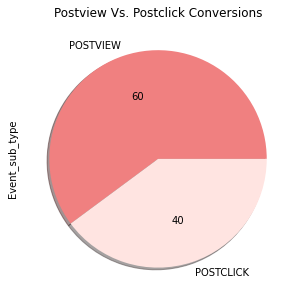

In [251]:
# Percentage of postview and postclicks subtypes 

activity['Event_sub_type'].value_counts().plot(title = 'Postview Vs. Postclick Conversions',kind='pie',autopct = '%.0f',
                                               shadow = True, figsize = (10,5), colors = ['lightcoral', 'mistyrose'])
plt.savefig('postclickpostview.png')

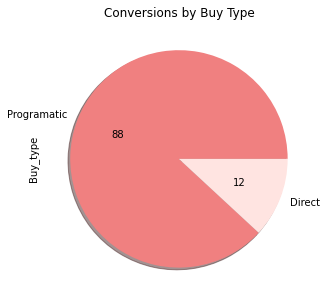

In [252]:
activity['Buy_type'].value_counts().plot(title = 'Conversions by Buy Type',kind='pie', autopct = '%.0f',
                                               shadow = True, figsize = (10,5), colors = ['lightcoral', 'mistyrose'])
plt.savefig('programaticdirect.png')

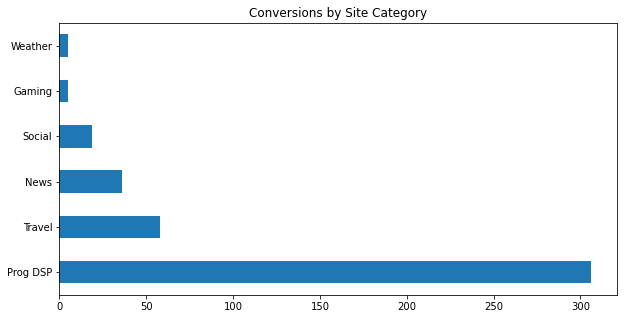

In [253]:
#Distribution of conversions by site category
activity['Site_category'].value_counts().plot(title = 'Conversions by Site Category',kind='barh',figsize = (10,5))
plt.savefig('conversions_by_site.png')

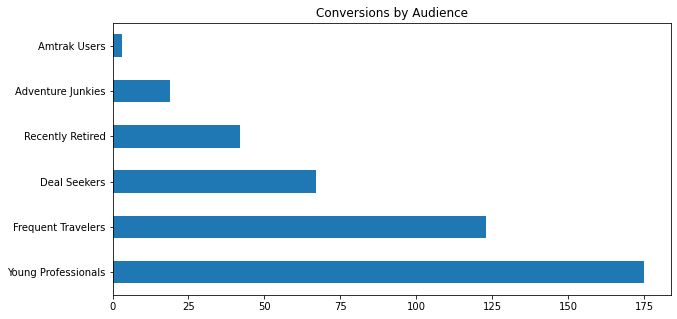

In [254]:
activity['Audience_name'].value_counts().plot(title = 'Conversions by Audience',kind='barh',figsize = (10,5))
plt.savefig('conversions_by_audience')

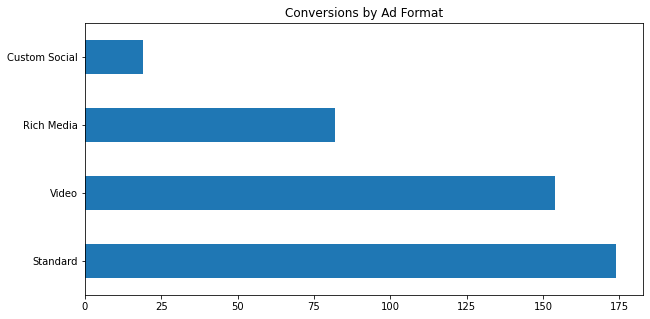

In [255]:
# conversions by ad format 

activity['Ad_format'].value_counts().plot(title = 'Conversions by Ad Format',kind='barh',figsize = (10,5))
plt.savefig('conversions_by_ad.png')

In [85]:
impressions.head()


,User_id,Impression_time,Placement_id,Ad_id,Creative_id,Operating_system_id,Market_id,Site_id,Channel,Platform,...,Buy_type,Prog_sub_buy_type,Site_category,Audience_name,Market,Ad_size,Ad_format,Marketing_goal,OS_id,OS
0,UID_px4mTvkq,2017-10-01 00:15:00,201278266,401163967,90785766,501011.0,197.0,39869,Desk,Desk,...,Programatic,RTB,Prog DSP,Deal Seekers,San Francisco-Oakland-San Jose CA,728x90,Standard,DR,501011.0,Windows
1,UID_MG6hVBY9,2017-10-01 00:20:00,201277651,401163961,90785526,501011.0,190.0,39869,Desk,Desk,...,Programatic,RTB,Prog DSP,Frequent Travelers,Albuquerque-Santa Fe NM,300x250,Rich Media,DR,501011.0,Windows
2,UID_OmWyqHGo,2017-10-01 00:22:00,201271355,401163961,90784365,501011.0,204.0,39869,Desk,Desk,...,Programatic,RTB,Prog DSP,Deal Seekers,San Diego CA,300x250,Rich Media,DR,501011.0,Windows
3,UID_hSTrNBd6,2017-10-01 00:22:00,201278380,401163961,90784128,501011.0,57.0,39869,Desk,Desk,...,Programatic,RTB,Prog DSP,Deal Seekers,Syracuse NY,300x250,Rich Media,DR,501011.0,Windows
4,UID__13H_6AQ,2017-10-01 00:25:00,201271358,401163961,90785760,501011.0,14.0,39869,Desk,Desk,...,Programatic,RTB,Prog DSP,Deal Seekers,Baltimore MD,300x250,Rich Media,DR,501011.0,Windows


In [97]:
impressions['Cost_per_impression'] = impressions[' CPM '] / 1000

In [99]:
impressions.head()

,User_id,Impression_time,Placement_id,Ad_id,Creative_id,Operating_system_id,Market_id,Site_id,Channel,Platform,...,Prog_sub_buy_type,Site_category,Audience_name,Market,Ad_size,Ad_format,Marketing_goal,OS_id,OS,Cost_per_impression
0,UID_px4mTvkq,2017-10-01 00:15:00,201278266,401163967,90785766,501011.0,197.0,39869,Desk,Desk,...,RTB,Prog DSP,Deal Seekers,San Francisco-Oakland-San Jose CA,728x90,Standard,DR,501011.0,Windows,0.01936
1,UID_MG6hVBY9,2017-10-01 00:20:00,201277651,401163961,90785526,501011.0,190.0,39869,Desk,Desk,...,RTB,Prog DSP,Frequent Travelers,Albuquerque-Santa Fe NM,300x250,Rich Media,DR,501011.0,Windows,0.00382
2,UID_OmWyqHGo,2017-10-01 00:22:00,201271355,401163961,90784365,501011.0,204.0,39869,Desk,Desk,...,RTB,Prog DSP,Deal Seekers,San Diego CA,300x250,Rich Media,DR,501011.0,Windows,0.02236
3,UID_hSTrNBd6,2017-10-01 00:22:00,201278380,401163961,90784128,501011.0,57.0,39869,Desk,Desk,...,RTB,Prog DSP,Deal Seekers,Syracuse NY,300x250,Rich Media,DR,501011.0,Windows,0.00152
4,UID__13H_6AQ,2017-10-01 00:25:00,201271358,401163961,90785760,501011.0,14.0,39869,Desk,Desk,...,RTB,Prog DSP,Deal Seekers,Baltimore MD,300x250,Rich Media,DR,501011.0,Windows,0.00308


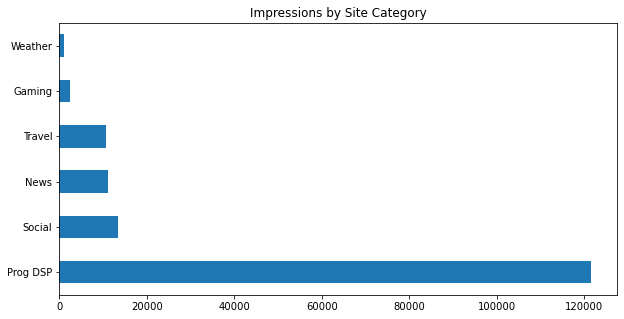

In [256]:
impressions['Site_category'].value_counts().plot(title = 'Impressions by Site Category',kind='barh',figsize = (10,5))
plt.savefig('impressions_by_site.png')

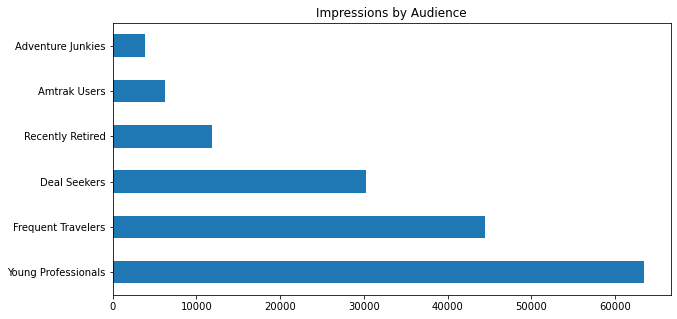

In [257]:
impressions['Audience_name'].value_counts().plot(title = 'Impressions by Audience',kind='barh',figsize = (10,5))
plt.savefig('impressions_by_audience.png')

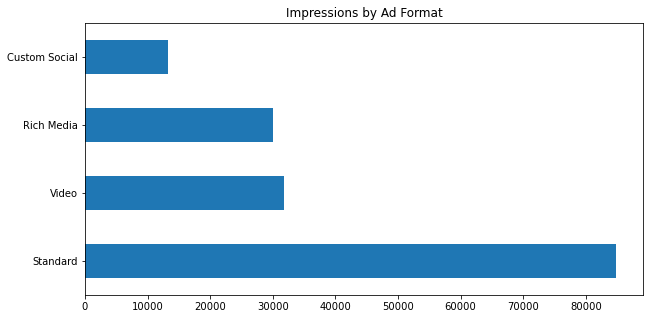

In [258]:
impressions['Ad_format'].value_counts().plot(title = 'Impressions by Ad Format',kind='barh',figsize = (10,5))
plt.savefig('impressions_by_ad.png')

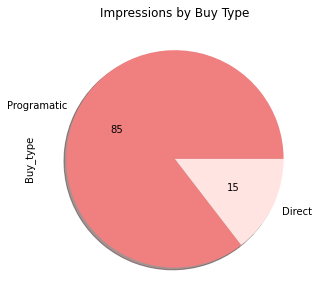

In [259]:
impressions['Buy_type'].value_counts().plot(title = 'Impressions by Buy Type',kind='pie', autopct = '%.0f',
                                               shadow = True, figsize = (10,5), colors = ['lightcoral', 'mistyrose'])
plt.savefig('impressions_by_buy_type.png')

In [121]:
#Calculating conversion rate by site 
#initializing pd dataframe for easier viewing 

Website_CR = pd.DataFrame(columns = ['Website', 'Conversions', 'Impressions', 'CR_Rate'], index = range(6))


#function used to input value counts from impressions
def site_count(categories):
    total_count = []
    for category in categories:
        total_count.append(impressions['Site_category'].value_counts()[category])
    return total_count

def site_cost(categories):
    total_cost = []
    for category in categories:
        total_cost.append(impressions.groupby('Site_category')['Cost_per_impression'].sum()[category])
    return total_cost

#Creating columns
Website_CR['Website'] = activity['Site_category'].value_counts().index.tolist()
Website_CR['Conversions'] = activity['Site_category'].value_counts().tolist()
Website_CR['Impressions'] = site_count(['Prog DSP', 'Travel','News','Social','Gaming','Weather'])
Website_CR['CR_Rate'] = Website_CR['Conversions']/Website_CR['Impressions']
Website_CR['Total Cost Impressions'] = site_cost(['Prog DSP', 'Travel','News','Social','Gaming','Weather'])

Website_CR

,Website,Conversions,Impressions,CR_Rate,Total Cost Impressions
0,Prog DSP,306,121477,0.002519,2678.80360
1,Travel,58,10738,0.005401,311.57825
2,News,36,11085,0.003248,697.70306
3,Social,19,13341,0.001424,869.21675
4,Gaming,5,2486,0.002011,152.55000
5,Weather,5,970,0.005155,18.69547


In [123]:
#Calculating conversion rate by Audience

Audience_CR = pd.DataFrame(columns = ['Audience', 'Conversions', 'Impressions', 'CR_Rate'], index = range(6))


#function used to input value counts from impressions
def audience_count(categories):
    total_count = []
    for category in categories:
        total_count.append(impressions['Audience_name'].value_counts()[category])
    return total_count
def audience_cost(categories):
    total_cost = []
    for category in categories:
        total_cost.append(impressions.groupby('Audience_name')['Cost_per_impression'].sum()[category])
    return total_cost

Audience_CR['Audience'] = activity['Audience_name'].value_counts().index.tolist()
Audience_CR['Conversions'] = activity['Audience_name'].value_counts().tolist()
Audience_CR['Impressions'] = audience_count(['Young Professionals','Frequent Travelers','Deal Seekers',
                                            'Recently Retired', 'Adventure Junkies', 'Amtrak Users'])
Audience_CR['CR_Rate'] = Audience_CR['Conversions']/Audience_CR['Impressions']
Audience_CR['Total Cost Impressions'] = audience_cost(['Young Professionals','Frequent Travelers','Deal Seekers',
                                            'Recently Retired', 'Adventure Junkies', 'Amtrak Users'])
Audience_CR

,Audience,Conversions,Impressions,CR_Rate,Total Cost Impressions
0,Young Professionals,175,63428,0.002759,2251.93197
1,Frequent Travelers,123,44427,0.002769,777.94168
2,Deal Seekers,67,30256,0.002214,161.70549
3,Recently Retired,42,11837,0.003548,552.88917
4,Adventure Junkies,19,3849,0.004936,147.92603
5,Amtrak Users,3,6300,0.000476,836.15279


In [124]:
#Calculating conversion rate by ad format 

Ad_CR = pd.DataFrame(columns = ['Ad Format', 'Conversions', 'Impressions', 'CR_Rate'], index = range(4))

#function used to input value counts from impressions
def ad_count(categories):
    total_count = []
    for category in categories:
        total_count.append(impressions['Ad_format'].value_counts()[category])
    return total_count

def ad_cost(categories):
    total_cost = []
    for category in categories:
        total_cost.append(impressions.groupby('Ad_format')['Cost_per_impression'].sum()[category])
    return total_cost

Ad_CR['Ad Format'] = activity['Ad_format'].value_counts().index.tolist()
Ad_CR['Conversions'] = activity['Ad_format'].value_counts().tolist()
Ad_CR['Impressions'] = ad_count(['Standard', 'Video', 'Rich Media', 'Custom Social'])
Ad_CR['CR_Rate'] = Ad_CR['Conversions']/Ad_CR['Impressions']
Ad_CR['Total Cost Impressions'] = ad_cost(['Standard', 'Video', 'Rich Media', 'Custom Social'])

Ad_CR

,Ad Format,Conversions,Impressions,CR_Rate,Total Cost Impressions
0,Standard,174,84877,0.002050,1804.88538
1,Video,154,31782,0.004846,1770.95460
2,Rich Media,82,30097,0.002725,283.49040
3,Custom Social,19,13341,0.001424,869.21675


# Prediction Analysis

In [181]:
#First we wanna join impressions and conversions data by user id 

i_c = pd.merge(impressions, activity, how = 'left')
i_c.head()


,User_id,Impression_time,Placement_id,Ad_id,Creative_id,Operating_system_id,Market_id,Site_id,Channel,Platform,...,Market,Ad_size,Ad_format,Marketing_goal,OS_id,OS,Cost_per_impression,Conversion_time,Event_type,Event_sub_type
0,UID_px4mTvkq,2017-10-01 00:15:00,201278266,401163967,90785766,501011.0,197.0,39869,Desk,Desk,...,San Francisco-Oakland-San Jose CA,728x90,Standard,DR,501011.0,Windows,0.01936,NaT,NaN,NaN
1,UID_MG6hVBY9,2017-10-01 00:20:00,201277651,401163961,90785526,501011.0,190.0,39869,Desk,Desk,...,Albuquerque-Santa Fe NM,300x250,Rich Media,DR,501011.0,Windows,0.00382,NaT,NaN,NaN
2,UID_OmWyqHGo,2017-10-01 00:22:00,201271355,401163961,90784365,501011.0,204.0,39869,Desk,Desk,...,San Diego CA,300x250,Rich Media,DR,501011.0,Windows,0.02236,NaT,NaN,NaN
3,UID_hSTrNBd6,2017-10-01 00:22:00,201278380,401163961,90784128,501011.0,57.0,39869,Desk,Desk,...,Syracuse NY,300x250,Rich Media,DR,501011.0,Windows,0.00152,NaT,NaN,NaN
4,UID__13H_6AQ,2017-10-01 00:25:00,201271358,401163961,90785760,501011.0,14.0,39869,Desk,Desk,...,Baltimore MD,300x250,Rich Media,DR,501011.0,Windows,0.00308,NaT,NaN,NaN


In [182]:
i_c.describe(include = 'all')

,User_id,Impression_time,Placement_id,Ad_id,Creative_id,Operating_system_id,Market_id,Site_id,Channel,Platform,...,Market,Ad_size,Ad_format,Marketing_goal,OS_id,OS,Cost_per_impression,Conversion_time,Event_type,Event_sub_type
count,160097,160097,1.600970e+05,1.600970e+05,1.600970e+05,154627.000000,152672.000000,160097.000000,160097,155213,...,152672,160097,160097,160097,154627.000000,154627,160097.000000,766,766,766
unique,43709,77390,NaN,NaN,NaN,NaN,NaN,NaN,2,3,...,209,15,4,2,NaN,6,NaN,429,1,2
top,0,2017-12-26 19:23:00,NaN,NaN,NaN,NaN,NaN,NaN,Mob,IA,...,New York NY,300x250,Standard,Brand,NaN,Android,NaN,2017-12-30 03:13:00,CONVERSION,POSTVIEW
freq,1717,16,NaN,NaN,NaN,NaN,NaN,NaN,105664,55363,...,11772,63018,84877,90847,NaN,60828,NaN,37,766,430
first,NaN,2017-10-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-03 03:45:00,NaN,NaN
last,NaN,2018-01-01 00:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-11 06:58:00,NaN,NaN
mean,NaN,NaN,2.055831e+08,4.161786e+08,9.349993e+07,501012.290771,89.492684,41713.289731,NaN,NaN,...,NaN,NaN,NaN,NaN,501012.290771,NaN,0.029536,NaN,NaN,NaN
std,NaN,NaN,3.747370e+06,4.427920e+07,1.724189e+06,2.072299,70.560241,10885.971662,NaN,NaN,...,NaN,NaN,NaN,NaN,2.072299,NaN,0.077545,NaN,NaN,NaN
min,NaN,NaN,2.012713e+08,4.009045e+08,9.060061e+07,501011.000000,2.000000,11938.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,501011.000000,NaN,0.000660,NaN,NaN,NaN
25%,NaN,NaN,2.012778e+08,4.011645e+08,9.377963e+07,501011.000000,22.000000,39362.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,501011.000000,NaN,0.004060,NaN,NaN,NaN


In [183]:
i_c.columns

Index(['User_id', 'Impression_time', 'Placement_id', 'Ad_id', 'Creative_id',
       'Operating_system_id', 'Market_id', 'Site_id', 'Channel', 'Platform',
       'Audience_id', 'Placement_size', ' CPM ', 'Buy_type',
       'Prog_sub_buy_type', 'Site_category', 'Audience_name', 'Market',
       'Ad_size', 'Ad_format', 'Marketing_goal', 'OS_id', 'OS',
       'Cost_per_impression', 'Conversion_time', 'Event_type',
       'Event_sub_type'],
      dtype='object')

In [184]:
#dropping columns not needed for analysis 
i_c = i_c.drop(columns = ['Placement_id', 'Ad_id', 'Creative_id', 'Operating_system_id', 'Market_id',
                          'Site_id', 'Audience_id','OS_id', 'Ad_size','Marketing_goal'])
i_c.head()

,User_id,Impression_time,Channel,Platform,Placement_size,CPM,Buy_type,Prog_sub_buy_type,Site_category,Audience_name,Market,Ad_format,OS,Cost_per_impression,Conversion_time,Event_type,Event_sub_type
0,UID_px4mTvkq,2017-10-01 00:15:00,Desk,Desk,728x90,19.36,Programatic,RTB,Prog DSP,Deal Seekers,San Francisco-Oakland-San Jose CA,Standard,Windows,0.01936,NaT,NaN,NaN
1,UID_MG6hVBY9,2017-10-01 00:20:00,Desk,Desk,300x250,3.82,Programatic,RTB,Prog DSP,Frequent Travelers,Albuquerque-Santa Fe NM,Rich Media,Windows,0.00382,NaT,NaN,NaN
2,UID_OmWyqHGo,2017-10-01 00:22:00,Desk,Desk,300x250,22.36,Programatic,RTB,Prog DSP,Deal Seekers,San Diego CA,Rich Media,Windows,0.02236,NaT,NaN,NaN
3,UID_hSTrNBd6,2017-10-01 00:22:00,Desk,Desk,300x250,1.52,Programatic,RTB,Prog DSP,Deal Seekers,Syracuse NY,Rich Media,Windows,0.00152,NaT,NaN,NaN
4,UID__13H_6AQ,2017-10-01 00:25:00,Desk,Desk,300x250,3.08,Programatic,RTB,Prog DSP,Deal Seekers,Baltimore MD,Rich Media,Windows,0.00308,NaT,NaN,NaN


In [185]:
i_c.drop(i_c.columns.difference(['User_id','CPM', 'Buy_type','Prog_sub_buy_type',
                                 'Site_category','Audience_name','Market','Ad_format','OS','Event_type' ]), 1, inplace=True)

In [186]:
i_c.head()

,User_id,Buy_type,Prog_sub_buy_type,Site_category,Audience_name,Market,Ad_format,OS,Event_type
0,UID_px4mTvkq,Programatic,RTB,Prog DSP,Deal Seekers,San Francisco-Oakland-San Jose CA,Standard,Windows,NaN
1,UID_MG6hVBY9,Programatic,RTB,Prog DSP,Frequent Travelers,Albuquerque-Santa Fe NM,Rich Media,Windows,NaN
2,UID_OmWyqHGo,Programatic,RTB,Prog DSP,Deal Seekers,San Diego CA,Rich Media,Windows,NaN
3,UID_hSTrNBd6,Programatic,RTB,Prog DSP,Deal Seekers,Syracuse NY,Rich Media,Windows,NaN
4,UID__13H_6AQ,Programatic,RTB,Prog DSP,Deal Seekers,Baltimore MD,Rich Media,Windows,NaN


In [187]:
#encoding categorical variables 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = ['Buy_type','Prog_sub_buy_type','Site_category','Audience_name','Market','Ad_format','OS']
#
# Encode labels of multiple columns at once
#
i_c[cols] = i_c[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
#changing conversions to be 1 and Nan values to 0 
i_c['Event_type'] = np.where((i_c['Event_type'] == 'CONVERSION'), 1, i_c['Event_type'])
i_c['Event_type'] = i_c['Event_type'].replace(np.nan, 0)

i_c.head()

,User_id,Buy_type,Prog_sub_buy_type,Site_category,Audience_name,Market,Ad_format,OS,Event_type
0,UID_px4mTvkq,1,2,2,2,167,2,4,0
1,UID_MG6hVBY9,1,2,2,3,3,1,4,0
2,UID_OmWyqHGo,1,2,2,2,166,1,4,0
3,UID_hSTrNBd6,1,2,2,2,181,1,4,0
4,UID__13H_6AQ,1,2,2,2,12,1,4,0


In [188]:
i_c.dtypes

User_id              object
Buy_type              int32
Prog_sub_buy_type     int32
Site_category         int32
Audience_name         int32
Market                int32
Ad_format             int32
OS                    int32
Event_type            int64
dtype: object

In [189]:
columns = ['Buy_type', 'Prog_sub_buy_type', 'Site_category', 'Audience_name','Market','Ad_format','OS']

min_max = MinMaxScaler()
i_c[columns] = min_max.fit_transform(i_c[columns])
i_c.head()

,User_id,Buy_type,Prog_sub_buy_type,Site_category,Audience_name,Market,Ad_format,OS,Event_type
0,UID_px4mTvkq,1.0,1.0,0.4,0.4,0.799043,0.666667,0.666667,0
1,UID_MG6hVBY9,1.0,1.0,0.4,0.6,0.014354,0.333333,0.666667,0
2,UID_OmWyqHGo,1.0,1.0,0.4,0.4,0.794258,0.333333,0.666667,0
3,UID_hSTrNBd6,1.0,1.0,0.4,0.4,0.866029,0.333333,0.666667,0
4,UID__13H_6AQ,1.0,1.0,0.4,0.4,0.057416,0.333333,0.666667,0


In [190]:
#Seeing ratio of conversions to impressions
print('Class Ratio:', sum(i_c['Event_type'])/len(i_c['Event_type']))

Class Ratio: 0.0047845993366521546


In [219]:
#finding splits and associated ratios 

skf = StratifiedKFold(n_splits=5)
target = i_c.loc[:,'Event_type']

count = 1

for train_index, test_index in skf.split(i_c.iloc[:,1:], target):
    train = i_c.iloc[:,1:].loc[train_index,:]
    test = i_c.iloc[:,1:].loc[test_index,:]
    print('Fold',str(fold_no),
          'Ratio:',
          sum(test['Event_type'])/len(test['Event_type']))
    count += 1


Fold 1 Class Ratio: 0.004778263585259213
Fold 2 Class Ratio: 0.004809494066208619
Fold 3 Class Ratio: 0.004778412817389675
Fold 4 Class Ratio: 0.004778412817389675
Fold 5 Class Ratio: 0.004778412817389675


In [220]:
model = LogisticRegression()

def train_model(dataset,train, test, count):
    
    X = dataset.iloc[:,1:8].columns.values
    y = ['Event_type']
    X_train = train[X]
    y_train = train[y]
    X_test = test[X]
    y_test = test[y]
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print('Fold',str(fold_no),
          'Accuracy:',
          accuracy_score(y_test,predictions), )
    importance = model.coef_[0]
    #summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))

In [221]:
count = 1

for train_index, test_index in skf.split(i_c.iloc[:,1:], target):
    train = i_c.iloc[:,1:].loc[train_index,:]
    test = i_c.iloc[:,1:].loc[test_index,:]
    train_model(i_c,train,test,count)
    count += 1

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 1 Accuracy: 0.9952217364147408
Feature: 0, Score: 0.19554
Feature: 1, Score: -0.98045
Feature: 2, Score: -0.86065
Feature: 3, Score: 0.21914
Feature: 4, Score: 0.25654
Feature: 5, Score: 0.37875
Feature: 6, Score: 0.50794


C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 2 Accuracy: 0.9951905059337913
Feature: 0, Score: 0.31704
Feature: 1, Score: -1.50916
Feature: 2, Score: -2.23765
Feature: 3, Score: 0.59229
Feature: 4, Score: 0.20969
Feature: 5, Score: 0.00007
Feature: 6, Score: 0.29057


C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 3 Accuracy: 0.9952215871826103
Feature: 0, Score: -0.23275
Feature: 1, Score: -1.15832
Feature: 2, Score: -0.37612
Feature: 3, Score: 0.68204
Feature: 4, Score: 0.17698
Feature: 5, Score: 0.56682
Feature: 6, Score: 0.34353


C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 4 Accuracy: 0.9952215871826103
Feature: 0, Score: -0.13696
Feature: 1, Score: -1.00426
Feature: 2, Score: -0.31594
Feature: 3, Score: 0.55467
Feature: 4, Score: 0.12976
Feature: 5, Score: 0.51158
Feature: 6, Score: 0.17971


C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 5 Accuracy: 0.9952215871826103
Feature: 0, Score: -0.16255
Feature: 1, Score: -0.83471
Feature: 2, Score: 0.26385
Feature: 3, Score: 0.48235
Feature: 4, Score: 0.12963
Feature: 5, Score: 0.33406
Feature: 6, Score: 0.27539


### Accuracies are too high due to large label imbalance so going to split into 5 subsets, where each subset has lower number of non conversions so as to lower the imbalance and make for a better model

In [234]:
#accuracies are way too high so want to try omitting data first then performing stratified kfold 

no_conversions = i_c.loc[i_c['Event_type'] == 0]
conversions = i_c.loc[i_c['Event_type'] == 1]

In [235]:
print(len(no_conversions))
print(len(conversions))

159331
766


In [236]:
#creating subsets of data where number of no conversions will be lower to account for label imbalance

subset1 = pd.concat([no_conversions.sample(3000, replace = False), conversions], axis = 0).reset_index().drop(columns = 'index')
subset2 = pd.concat([no_conversions.sample(3000, replace = False), conversions], axis = 0).reset_index().drop(columns = 'index')
subset3 = pd.concat([no_conversions.sample(3000, replace = False), conversions], axis = 0).reset_index().drop(columns = 'index')
subset4 = pd.concat([no_conversions.sample(3000, replace = False), conversions], axis = 0).reset_index().drop(columns = 'index')
subset5 = pd.concat([no_conversions.sample(3000, replace = False), conversions], axis = 0).reset_index().drop(columns = 'index')

In [238]:
#subset 1 stratified k fold 

skf = StratifiedKFold(n_splits=5)
target = subset1.loc[:,'Event_type']

count = 1

for train_index, test_index in skf.split(subset1.iloc[:,1:], target):
    train = subset1.iloc[:,1:].loc[train_index,:]
    test = subset1.iloc[:,1:].loc[test_index,:]
    print('Fold',str(count),
          'Class Ratio:',
          sum(test['Event_type'])/len(test['Event_type']))
    count += 1

    

Fold 1 Class Ratio: 0.20424403183023873
Fold 2 Class Ratio: 0.20318725099601595
Fold 3 Class Ratio: 0.20318725099601595
Fold 4 Class Ratio: 0.20318725099601595
Fold 5 Class Ratio: 0.20318725099601595


In [239]:
count = 1

for train_index, test_index in skf.split(subset1.iloc[:,1:], target):
    train = subset1.iloc[:,1:].loc[train_index,:]
    test =subset1.iloc[:,1:].loc[test_index,:]
    train_model(subset1,train,test,count)
    count += 1

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Fold 1 Accuracy: 0.7957559681697612
Feature: 0, Score: -0.05798
Feature: 1, Score: -0.93994
Feature: 2, Score: -0.54549
Feature: 3, Score: 0.58135
Feature: 4, Score: 0.15348
Feature: 5, Score: 0.81630
Feature: 6, Score: 0.62098
Fold 2 Accuracy: 0.796812749003984
Feature: 0, Score: 0.19962
Feature: 1, Score: -1.17124
Feature: 2, Score: -1.44968
Feature: 3, Score: 0.32498
Feature: 4, Score: 0.04906
Feature: 5, Score: 0.29324
Feature: 6, Score: 0.41353
Fold 3 Accuracy: 0.796812749003984
Feature: 0, Score: -0.10715
Feature: 1, Score: -1.08222
Feature: 2, Score: -0.49222
Feature: 3, Score: 0.50391
Feature: 4, Score: 0.08885
Feature: 5, Score: 0.47336
Feature: 6, Score: 0.45019
Fold 4 Accuracy: 0.796812749003984
Feature: 0, Score: -0.14383
Feature: 1, Score: -1.09212
Feature: 2, Score: -0.45502
Feature: 3, Score: 0.56504
Feature: 4, Score: 0.07107
Feature: 5, Score: 0.41054
Feature: 6, Score: 0.22514
Fold 5 Accuracy: 0.796812749003984
Feature: 0, Score: -0.05076
Feature: 1, Score: -0.66674
F

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [240]:
#subset 2 stratified k fold 

skf = StratifiedKFold(n_splits=5)
target = subset2.loc[:,'Event_type']

count = 1

for train_index, test_index in skf.split(subset2.iloc[:,1:], target):
    train = subset2.iloc[:,1:].loc[train_index,:]
    test = subset2.iloc[:,1:].loc[test_index,:]
    print('Fold',str(count),
          'Class Ratio:',
          sum(test['Event_type'])/len(test['Event_type']))
    count += 1


Fold 1 Class Ratio: 0.20424403183023873
Fold 2 Class Ratio: 0.20318725099601595
Fold 3 Class Ratio: 0.20318725099601595
Fold 4 Class Ratio: 0.20318725099601595
Fold 5 Class Ratio: 0.20318725099601595


In [241]:
count = 1

for train_index, test_index in skf.split(subset2.iloc[:,1:], target):
    train = subset2.iloc[:,1:].loc[train_index,:]
    test =subset2.iloc[:,1:].loc[test_index,:]
    train_model(subset2,train,test,count)
    count += 1

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Fold 1 Accuracy: 0.7917771883289124
Feature: 0, Score: -0.05431
Feature: 1, Score: -0.83086
Feature: 2, Score: -0.09304
Feature: 3, Score: 0.82584
Feature: 4, Score: 0.29549
Feature: 5, Score: 0.85379
Feature: 6, Score: 0.59153
Fold 2 Accuracy: 0.796812749003984
Feature: 0, Score: 0.20809
Feature: 1, Score: -1.16557
Feature: 2, Score: -1.33121
Feature: 3, Score: 0.42772
Feature: 4, Score: 0.20776
Feature: 5, Score: 0.13962
Feature: 6, Score: 0.37015
Fold 3 Accuracy: 0.796812749003984
Feature: 0, Score: -0.10756
Feature: 1, Score: -0.99301
Feature: 2, Score: -0.14643
Feature: 3, Score: 0.58249
Feature: 4, Score: 0.17653
Feature: 5, Score: 0.49459
Feature: 6, Score: 0.34958
Fold 4 Accuracy: 0.796812749003984
Feature: 0, Score: -0.11399
Feature: 1, Score: -1.18572
Feature: 2, Score: -0.27158
Feature: 3, Score: 0.60738
Feature: 4, Score: 0.10614
Feature: 5, Score: 0.30315
Feature: 6, Score: 0.12159
Fold 5 Accuracy: 0.796812749003984
Feature: 0, Score: -0.01878
Feature: 1, Score: -0.45745
F

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [242]:
#subset 3 stratified k fold 

skf = StratifiedKFold(n_splits=5)
target = subset3.loc[:,'Event_type']

count = 1

for train_index, test_index in skf.split(subset3.iloc[:,1:], target):
    train = subset3.iloc[:,1:].loc[train_index,:]
    test = subset3.iloc[:,1:].loc[test_index,:]
    print('Fold',str(count),
          'Class Ratio:',
          sum(test['Event_type'])/len(test['Event_type']))
    count += 1


Fold 1 Class Ratio: 0.20424403183023873
Fold 2 Class Ratio: 0.20318725099601595
Fold 3 Class Ratio: 0.20318725099601595
Fold 4 Class Ratio: 0.20318725099601595
Fold 5 Class Ratio: 0.20318725099601595


In [243]:
count = 1

for train_index, test_index in skf.split(subset3.iloc[:,1:], target):
    train = subset3.iloc[:,1:].loc[train_index,:]
    test =subset3.iloc[:,1:].loc[test_index,:]
    train_model(subset3,train,test,count)
    count += 1

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Fold 1 Accuracy: 0.7957559681697612
Feature: 0, Score: -0.13344
Feature: 1, Score: -0.98117
Feature: 2, Score: -0.45496
Feature: 3, Score: 0.67853
Feature: 4, Score: 0.23153
Feature: 5, Score: 0.82821
Feature: 6, Score: 0.46939
Fold 2 Accuracy: 0.796812749003984
Feature: 0, Score: 0.06481
Feature: 1, Score: -1.28270
Feature: 2, Score: -1.40479
Feature: 3, Score: 0.35728
Feature: 4, Score: 0.19124
Feature: 5, Score: 0.14624
Feature: 6, Score: 0.19876
Fold 3 Accuracy: 0.796812749003984
Feature: 0, Score: -0.10698
Feature: 1, Score: -1.16108
Feature: 2, Score: -0.57469
Feature: 3, Score: 0.56776
Feature: 4, Score: 0.22857
Feature: 5, Score: 0.27727
Feature: 6, Score: 0.31083
Fold 4 Accuracy: 0.796812749003984
Feature: 0, Score: -0.08293
Feature: 1, Score: -1.15812
Feature: 2, Score: -0.45149
Feature: 3, Score: 0.59794
Feature: 4, Score: 0.06925
Feature: 5, Score: 0.18872
Feature: 6, Score: 0.07978
Fold 5 Accuracy: 0.796812749003984
Feature: 0, Score: -0.03926
Feature: 1, Score: -0.61644
F

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [244]:
#subset 4 stratified k fold 

skf = StratifiedKFold(n_splits=5)
target = subset4.loc[:,'Event_type']

count = 1

for train_index, test_index in skf.split(subset4.iloc[:,1:], target):
    train = subset4.iloc[:,1:].loc[train_index,:]
    test = subset4.iloc[:,1:].loc[test_index,:]
    print('Fold',str(count),
          'Class Ratio:',
          sum(test['Event_type'])/len(test['Event_type']))
    count += 1


Fold 1 Class Ratio: 0.20424403183023873
Fold 2 Class Ratio: 0.20318725099601595
Fold 3 Class Ratio: 0.20318725099601595
Fold 4 Class Ratio: 0.20318725099601595
Fold 5 Class Ratio: 0.20318725099601595


In [245]:
count = 1

for train_index, test_index in skf.split(subset4.iloc[:,1:], target):
    train = subset4.iloc[:,1:].loc[train_index,:]
    test =subset4.iloc[:,1:].loc[test_index,:]
    train_model(subset4,train,test,count)
    count += 1

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Fold 1 Accuracy: 0.7957559681697612
Feature: 0, Score: -0.06533
Feature: 1, Score: -1.10169
Feature: 2, Score: -0.61707
Feature: 3, Score: 0.73800
Feature: 4, Score: 0.31751
Feature: 5, Score: 0.68923
Feature: 6, Score: 0.49159
Fold 2 Accuracy: 0.796812749003984
Feature: 0, Score: 0.16660
Feature: 1, Score: -1.24129
Feature: 2, Score: -1.55036
Feature: 3, Score: 0.43524
Feature: 4, Score: 0.21783
Feature: 5, Score: 0.12555
Feature: 6, Score: 0.27208
Fold 3 Accuracy: 0.796812749003984
Feature: 0, Score: -0.08689
Feature: 1, Score: -1.21617
Feature: 2, Score: -0.56710
Feature: 3, Score: 0.59764
Feature: 4, Score: 0.22449
Feature: 5, Score: 0.30534
Feature: 6, Score: 0.33627
Fold 4 Accuracy: 0.796812749003984
Feature: 0, Score: -0.07522
Feature: 1, Score: -1.23340
Feature: 2, Score: -0.47322
Feature: 3, Score: 0.58438
Feature: 4, Score: 0.09319
Feature: 5, Score: 0.29610
Feature: 6, Score: 0.17500
Fold 5 Accuracy: 0.796812749003984
Feature: 0, Score: 0.00072
Feature: 1, Score: -0.73510
Fe

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [246]:
#subset 5 stratified k fold 

skf = StratifiedKFold(n_splits=5)
target = subset5.loc[:,'Event_type']

count = 1

for train_index, test_index in skf.split(subset5.iloc[:,1:], target):
    train = subset5.iloc[:,1:].loc[train_index,:]
    test = subset5.iloc[:,1:].loc[test_index,:]
    print('Fold',str(count),
          'Class Ratio:',
          sum(test['Event_type'])/len(test['Event_type']))
    count += 1


Fold 1 Class Ratio: 0.20424403183023873
Fold 2 Class Ratio: 0.20318725099601595
Fold 3 Class Ratio: 0.20318725099601595
Fold 4 Class Ratio: 0.20318725099601595
Fold 5 Class Ratio: 0.20318725099601595


In [247]:
count = 1

for train_index, test_index in skf.split(subset5.iloc[:,1:], target):
    train = subset5.iloc[:,1:].loc[train_index,:]
    test =subset5.iloc[:,1:].loc[test_index,:]
    train_model(subset5,train,test,count)
    count += 1

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Fold 1 Accuracy: 0.7957559681697612
Feature: 0, Score: -0.11771
Feature: 1, Score: -0.88435
Feature: 2, Score: -0.56608
Feature: 3, Score: 0.70763
Feature: 4, Score: 0.21964
Feature: 5, Score: 0.71165
Feature: 6, Score: 0.55321
Fold 2 Accuracy: 0.796812749003984
Feature: 0, Score: 0.06483
Feature: 1, Score: -1.21018
Feature: 2, Score: -1.51069
Feature: 3, Score: 0.32338
Feature: 4, Score: 0.12631
Feature: 5, Score: 0.14403
Feature: 6, Score: 0.25988
Fold 3 Accuracy: 0.796812749003984
Feature: 0, Score: -0.10165
Feature: 1, Score: -1.07638
Feature: 2, Score: -0.58135
Feature: 3, Score: 0.54089
Feature: 4, Score: 0.12706
Feature: 5, Score: 0.34768
Feature: 6, Score: 0.38727
Fold 4 Accuracy: 0.796812749003984
Feature: 0, Score: -0.16686
Feature: 1, Score: -0.89346
Feature: 2, Score: -0.26690
Feature: 3, Score: 0.53250
Feature: 4, Score: 0.12980
Feature: 5, Score: 0.46025
Feature: 6, Score: 0.18412
Fold 5 Accuracy: 0.796812749003984
Feature: 0, Score: -0.17922
Feature: 1, Score: -0.45946
F

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [260]:
np.mean([0.7957559681697612, 0.796812749003984, 0.796812749003984, 0.796812749003984, 0.796812749003984, 
        0.7917771883289124, 0.796812749003984, 0.796812749003984, 0.796812749003984, 0.796812749003984,
        0.7957559681697612, 0.796812749003984, 0.796812749003984,  0.796812749003984, 0.796812749003984,
         0.7957559681697612, 0.796812749003984, 0.796812749003984, 0.796812749003984, 0.796812749003984,
        0.7957559681697612, 0.796812749003984, 0.796812749003984, 0.796812749003984, 0.796812749003984 ])

0.7964422416435055